In [ ]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
df= pd.read_csv('mod.csv')
df


In [18]:
df[['area']]

,area
0,1000
1,1200
2,1500
3,2000


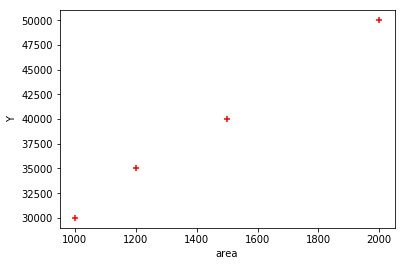

In [19]:
plt.xlabel('area')
plt.ylabel('Y')
plt.scatter(df.area,df.Y,color='red',marker='+')


In [27]:
new_df=df.drop('Y',axis='columns')
new_df
price=df.Y
reg=linear_model.LinearRegression()
reg.fit(new_df,price)
reg.predict([[3300]])



array([75506.60792952])

## flash prediction

In [29]:
df1 = pd.read_csv('viewers.csv')
df1

,flash_episode,flash_us_viewers,arrow_episode,arrow_us_viewers
0,1,4.83,1,2.84
1,2,4.27,2,2.32
2,3,3.59,3,2.55
3,4,3.53,4,2.49
4,5,3.46,5,2.73
5,6,3.73,6,2.60
6,7,3.47,7,2.64
7,8,4.34,8,3.92
8,9,4.66,9,3.06


In [35]:
df1.columns = ['fe','fv','ae','av']

In [55]:
dff = df1[['fe','fv']]

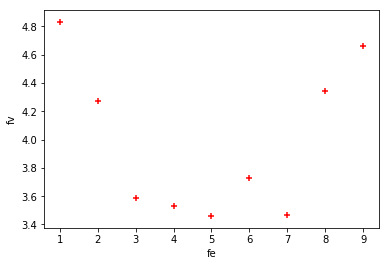

In [56]:
plt.xlabel('fe')
plt.ylabel('fv')
plt.scatter(dff.fe,dff.fv,color='red',marker='+')


In [93]:
reg=linear_model.LinearRegression()
reg.fit(dff[['fe']],dff[['fv']])
yfp = reg.predict(df_pred[['x_pred']])
mf = reg.coef_
cf = reg.intercept_

In [58]:
dfa = df1[['ae','av']]

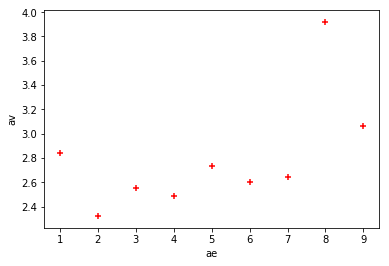

In [97]:
plt.xlabel('ae')
plt.ylabel('av')
plt.scatter(dfa.ae,dfa.av,color='red',marker='+')


In [92]:
reg=linear_model.LinearRegression()
reg.fit(dfa[['ae']],dfa[['av']])
yfa = reg.predict([[10]])
ma = reg.coef_
ca = reg.intercept_

In [63]:
df_pred = pd.read_csv('pred.csv')

In [64]:
yfa = reg.predict(df_pred)

In [65]:
yfa

array([[3.29194444],
       [3.39144444],
       [3.49094444],
       [3.59044444],
       [3.68994444]])

In [70]:
df_pred['Arr_vw'] = yfa
df_pred['Flash_vw'] = yfp

In [71]:
df_pred

,x_pred,Arr_vw,Flash_vw
0,10,3.291944,3.944167
1,11,3.391444,3.935667
2,12,3.490944,3.927167
3,13,3.590444,3.918667
4,14,3.689944,3.910167


In [73]:
df_pred.to_csv('pred1.csv')

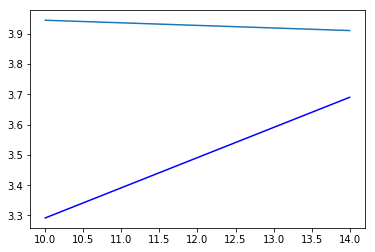

In [111]:
#plt.scatter(dfa.ae,dfa.av,color='blue',marker='+')
#plt.scatter(dff.fe,dff.fv,color='red',marker='*')
plt.plot(df_pred[['x_pred']],df_pred[['Arr_vw']])
plt.plot(df_pred[['x_pred']],df_pred[['Flash_vw']])

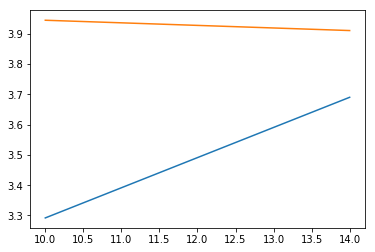

In [84]:
plt.plot(df_pred[['x_pred']],df_pred[['Arr_vw']],df_pred[['x_pred']],df_pred[['Flash_vw']])

In [104]:
def y(x,m,c):
    return(m * x + c)

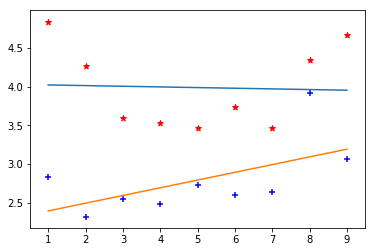

In [112]:
plt.scatter(dfa.ae,dfa.av,color='blue',marker='+')
plt.scatter(dff.fe,dff.fv,color='red',marker='*')
plt.plot(dff[['fe']], y(dff[['fe']],mf,cf),dfa[['ae']], y(dfa[['ae']],ma,ca))

In [132]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

Current size: [15.0, 12.0]


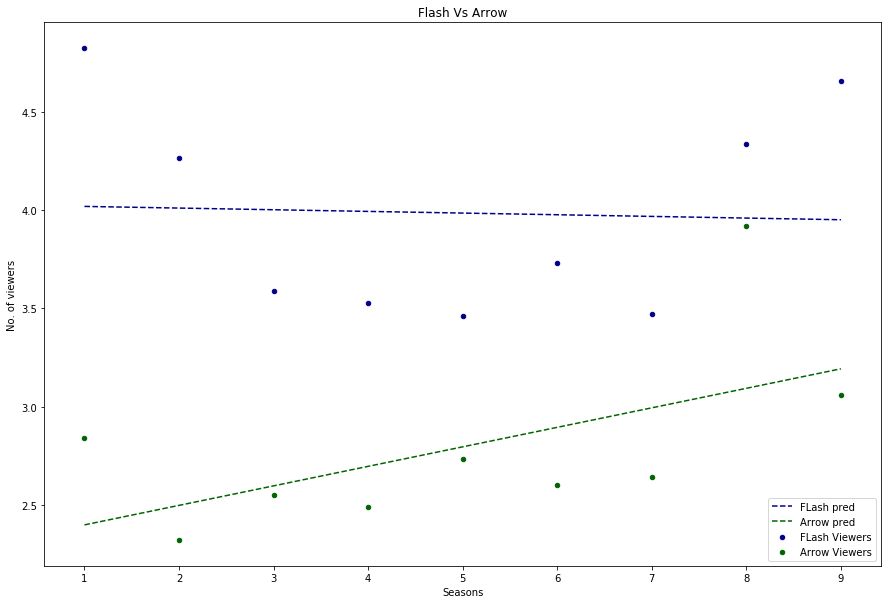

In [133]:
fig = plt.figure()

ax = plt.axes()

dff.plot.scatter(x='fe', y='fv', color='DarkBlue', label='FLash Viewers',ax=ax);

dfa.plot.scatter(x='ae', y='av', color='DarkGreen', label='Arrow Viewers', ax=ax)

plt.plot(dff[['fe']], y(dff[['fe']],mf,cf),color='DarkBlue',label='FLash pred',linestyle='dashed')

plt.plot(dfa[['ae']], y(dfa[['ae']],ma,ca),color='DarkGreen',label='Arrow pred',linestyle='dashed')

plt.title("Flash Vs Arrow")

plt.xlabel("Seasons")

plt.ylabel("No. of viewers")

plt.legend();

Current size: [6.0, 4.0]
